# Homework #4: How Shazam Works

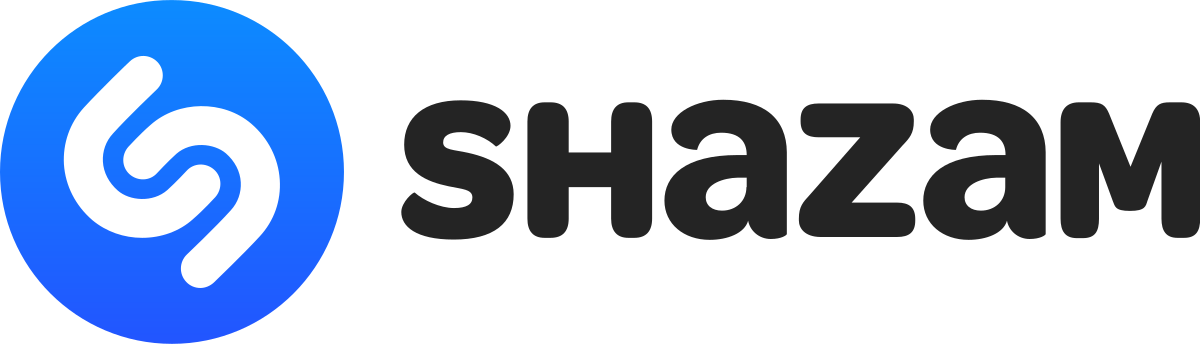

### Do not start the exercise until you fully understand the submission guidelines, which can be found here: https://docs.google.com/document/d/1Qip08JKIppVX6dGX4hkrUCPgRmgkWYmQLEDZY_yZi90/edit?usp=sharing

### For any material-related-questions, ask Ami. For any organization-related-questions, ask the TA.

## Read the following instructions carefully:


1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.
1. Kindly reminder: the exercises weight is 50% of the course's grade!

## This exercise summerize the following subjects:
1. Generate and detect a pure tone (sound generated by a sinus wave)
1. Generate and decypher a phone number dialed using a Dual tone multi-frequency (DTMF)
1. Generate a fingerprint of a song or short recording of part from a song
1. Basic demonstartion of songs identification using Shazam algorithm

## Data
Download the data (the whole directory) from here:
https://drive.google.com/drive/folders/18Sy5weuys7J1mVDRKdFUWzlL2GznbYGZ?usp=share_link

Submit this ipynb **only**.

In [1]:
# Imports
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import  spectrogram
from scipy.fft import fft, fftfreq
import wave
from numpy.fft import fft, ifft
import os
import math


# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Question 1: Generating and detecting a call with a dial tone phone (40 Points)

In this question we will summarize and practice the use of frequency analysis of sounds, specifically: the use of FFT and Spectrum analysis, to understand sound.

We will start with generating and identifying simple sinus sounds (pure tones), then generate and detect a sequence of digits dialed using a Dual Tone Multi-Frequency (DTMF) "Tone Phone"

__Note:__ All sub-questions have equal weight and the total points for this question are divided equally between them

### 1.1 Generate a sound based on 2 pure tones
Generate a sound consisting of 2 frequencies. Choose the frequencies f1 and f2 from the range $[100,3000]$. Normalize the sound data so that all the values are between -1 and +1.
Plot the FFT and spectogram as shown here:
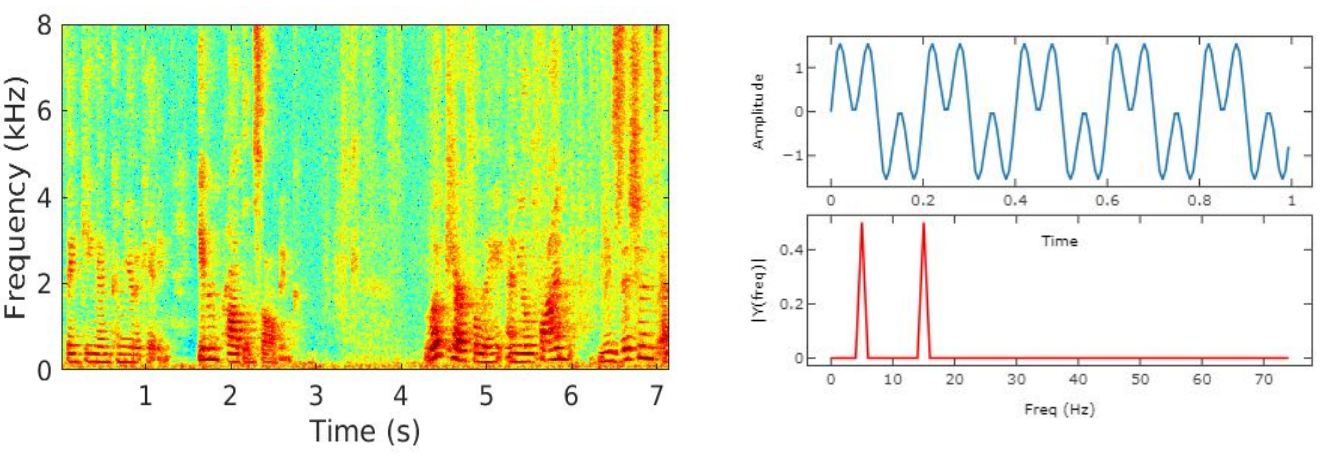

In [2]:
def create_2_tones_sound():
    '''
    Generate a sound consisting of 2 frequencies and plot its FFT and spectogram.
    :return: sound, the sound as a function of time
    '''
    f1,f2 = (None, None)
    sound = None
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    # Parameters
    #f1 = random.randint(100,3000)  # Hz
    #f2 = random.randint(100,3000)  # Hz
    f1 = 100
    f2 = 3000
    sampling_rate = 44100  # samples/second

    # Generate time samples for each tone
    t = np.linspace(0, 2, sampling_rate*2)

    # Generate sine waves
    sine_wave1 = np.sin(2 * np.pi *f1 * t)
    sine_wave2 = np.sin(2 * np.pi *f2 * t)

    # Combine the two tones
    combined_sine_wave = sine_wave1 + sine_wave2

    # Normalize the combined waveform
    min_sound = min(combined_sine_wave)
    max_sound = max(combined_sine_wave)
    
    sound = np.array([2*(x-min_sound)/ (max_sound-min_sound)-1 for x in combined_sine_wave])

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return sound


#another function with frequencies as input
def create_sound(freqs):
    '''
    Generate a sound consisting of 2 input frequencies and plot its FFT and spectogram.
    :return: sound, the sound as a function of time
    '''

    sound = None
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    f1 = freqs[0]
    f2 = freqs[1]
    sampling_rate = 44100  # samples/second

    # Generate time samples for each tone
    t = np.linspace(0, 2, sampling_rate*2)

    # Generate sine waves
    sine_wave1 = np.sin(2 * np.pi *f1 * t)
    sine_wave2 = np.sin(2 * np.pi *f2 * t)

    # Combine the two tones
    combined_sine_wave = sine_wave1 + sine_wave2

    # Normalize the combined waveform
    min_sound = min(combined_sine_wave)
    max_sound = max(combined_sine_wave)
    
    sound = np.array([2*(x-min_sound)/ (max_sound-min_sound)-1 for x in combined_sine_wave])

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return sound

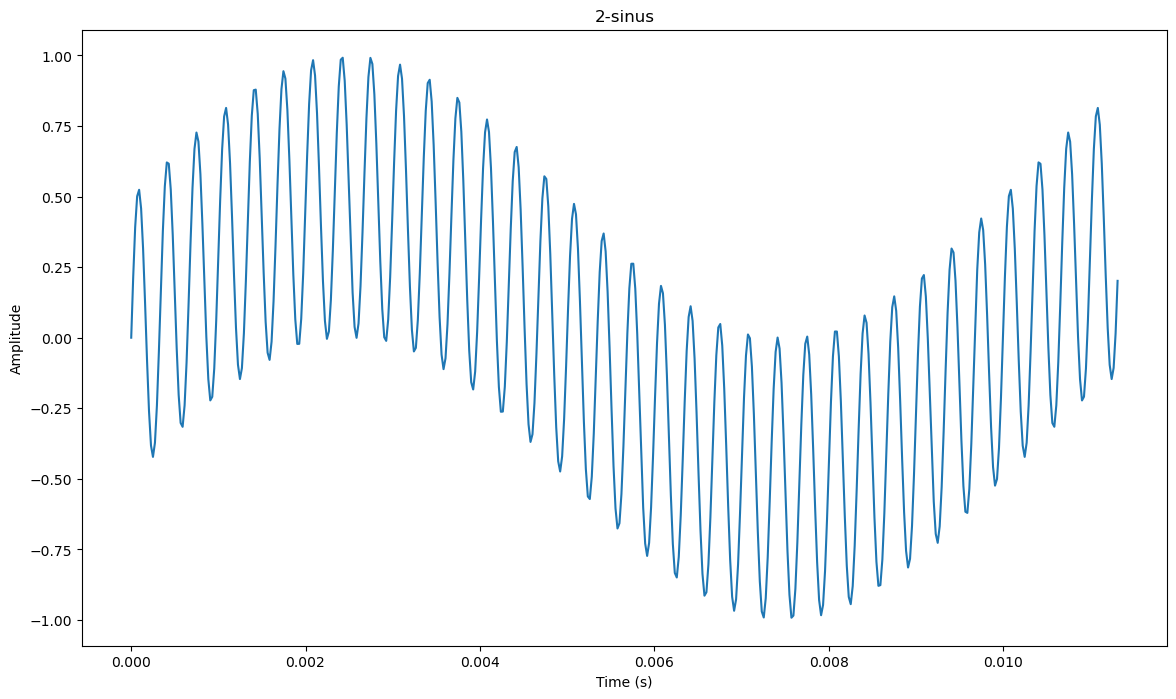

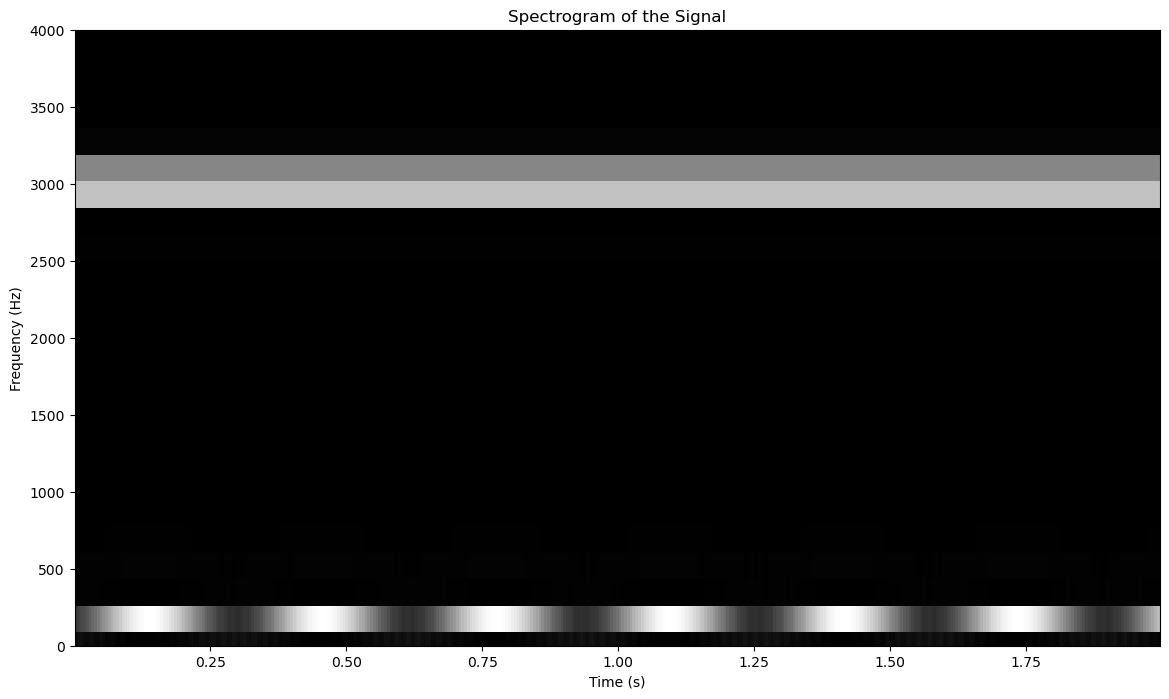

44100.0


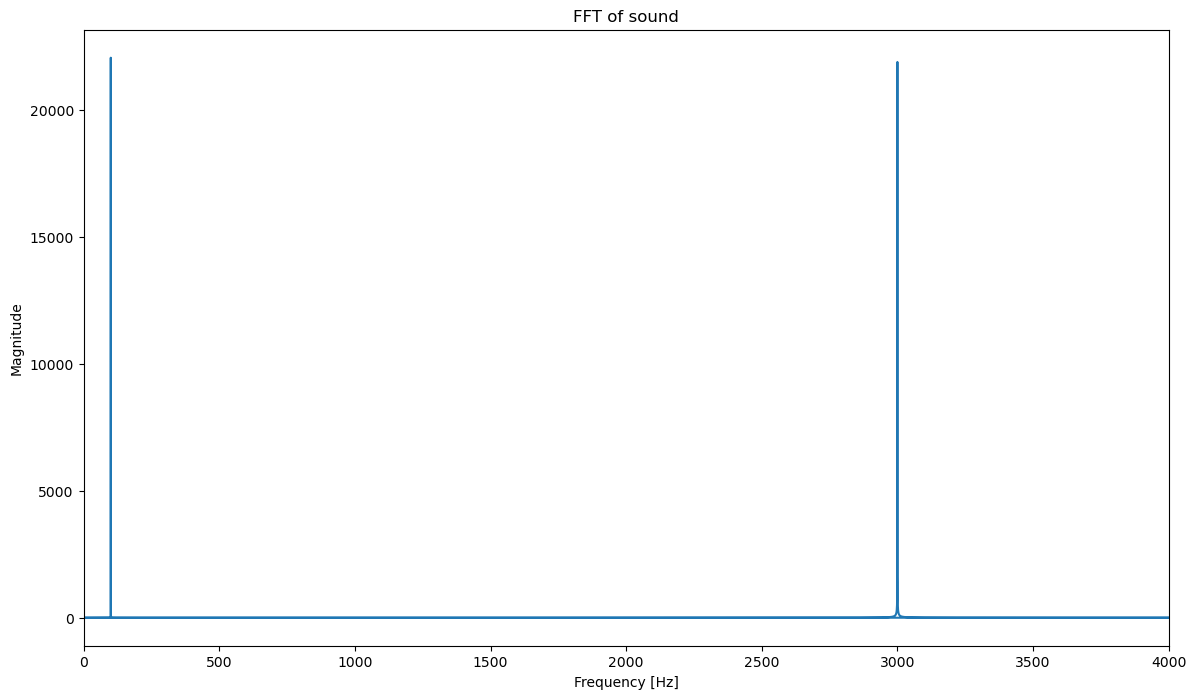

In [3]:
my_sound = create_2_tones_sound()

#calculate spectogram
sampling_rate = 44100
t = np.linspace(0, 2, sampling_rate*2)
f_spec, t_spec, Sxx = spectrogram(my_sound,fs=sampling_rate, window=('tukey', 0.5))

# Plot the signal on a time axis, first 1000 elements only, so we can see the sinus wave
plt.plot(t[0:500], my_sound[0:500])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('2-sinus')
plt.show()


# Plot the spectrogram
plt.pcolormesh(t_spec, f_spec, Sxx)
plt.ylim(top=4000, bottom=0)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram of the Signal')
plt.show()


# Plot the FFT (Fast-Fourier-Transform) of the above signal
yf = fft(my_sound)
xf = fftfreq(len(t), 1 / sampling_rate)
# Plot the FFT
print(len(xf)/2)
plt.plot(xf, np.abs(yf))
plt.xlim(right=4000,left=0)
plt.title("FFT of sound")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()




### 1.2 Identify frequencies from a sound signal
Implement Idendify.


In [4]:
 def identify_main_freq(sound):
    '''
    Identify the frequencies from a sound signal.
    :param sound: the sound as a function of time
    :return: 2 frequencies
    '''
    f1,f2 = (None, None) 
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    yf = fft(sound)
    xf = fftfreq(len(sound), 1 / sampling_rate)
    local_max = [0,0]
    j=0
    for i in range(1, len(yf)-1):
        if yf[i-1]< yf[i] and yf[i+1]<yf[i]:
            if xf[i] > 0:
                local_max[j] = xf[i]
                j+=1
        if j==2: break
    f1 = local_max[0]
    f2 = local_max[1]
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return f1,f2



In [5]:
f1,f2 = identify_main_freq(my_sound)
print('The frequencies generating the sound are: ',f1,'Hz, ',f2,'Hz')

The frequencies generating the sound are:  100.0 Hz,  3000.0 Hz


### 1.3 Generate the sound of a tone-phone for 10 digit call (like: 054 257 8620)
In this section, you will generate a sound consisting of 10 digits dialed from a "tone-phone" as exaplined in class and with the help of the python code presented in class.
1. Generate a sound of dialing a 10-digit number such as 054 257 8620 using a tone-phone. Use your own mobile number.

In [6]:
phone_number = '0542578620' # use your own mobile number, in this format

In [7]:
def generate_sound(x: str):
    '''
    Generates a sound of dialing the 10 digits passed as a string argument.
    :param x: the phone number to dial (like: 0542986725)
    :return: sound as an array
    '''
    sound = []
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    number_freq={
        '0' : (941,1336),
        '1' : (697,1209),
        '2' : (697,1336),
        '3' : (697,1477),
        '4' : (770,1209),
        '5' : (770,1336),
        '6' : (770,1477),
        '7' : (852,1209),
        '8' : (852,1336),
        '9' : (852,1477)
    }
    
    
    for i in range(len(x)):
        sound.append(create_sound(number_freq[x[i]]))
        
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return sound



In [8]:
my_phone_number = '0526984970'
sound = generate_sound(my_phone_number)

### 1.4 Identify a phone number from a sound wave
Identify the 10 digits dialed  using frequency analysis of sound.

In [9]:
def identify_phone_number(sound):
    '''
    Idenfities the 10 digits from a sound and return them.
    :param sound: sound as an array
    :return: a srting with the digits dialed such as '0542578620'
    '''
    phone_number = ''
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    number_freq={
        '0' : (941,1336),
        '1' : (697,1209),
        '2' : (697,1336),
        '3' : (697,1477),
        '4' : (770,1209),
        '5' : (770,1336),
        '6' : (770,1477),
        '7' : (852,1209),
        '8' : (852,1336),
        '9' : (852,1477)
    }
    for i in range (10):
        number = sound[i]
        f1,f2 = identify_main_freq(number)
        freqs = (f1,f2)
        for num , freq in number_freq.items():
            if freq == freqs:
                phone_number+= num
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return phone_number

In [10]:
identified_number = identify_phone_number(sound)
print(f'The phone number dialed was: {identified_number}')

The phone number dialed was: 0526984970


## Question 2: How Shazam algorithm works (60 Points)

We will generate a fingerprint of a set of songs and keep them in a small database. Then, we will record a short sample of one of the songs in a (little) noisy surrounding. And perform the following steps:
1. Create a spectrogram of the audio sample
1. Create the fingerprints for this sample
1. Look for a best match between the sample fingerprint and the many fingerprints of the complete songs in our database
1. Return with a song name and details, if the algorithm found a match, or return "not match found" if we cannot find any part of any song that seems similar enough to our sample. (Shazam does the same: Either return a match or reply it cannot find a match)

### 2.1 Functions implementation (30 of 60 points)
Implement the following helper functions.

In [11]:
def create_simplified_spectrogram(audio_data):
    '''
    Takes a audio data and return a simplified spectrogram based on the actual spectrogram of the sound
    with the following simplifications:
    (1) In the *time axis*, the spectrogram keep a single column of data per 0.1 sec even if the original spectrogram has
    many more columns per 0.1 sec of music. Keep the *max* value from the values of the original spectrogram
    in each frequency.
    (2) In the *frequency* axis, divide the total range of the frequency axis to 6 ranges, and keep only 6 values
    per each 0.1 sec winwon - one for each range. The value for each range will be the frequency with most energy
    (i.e. max value) in this range, in this 0.1 sec time window.
    :param audio_data: contain the audio data
    :return: spectrogram of the audio data
    '''
    spectrogram1 = None
    simple_spectrogram = None
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    # Open the wave file
    with wave.open(audio_data, 'rb') as file:
        # Read the wave file properties
        num_channels = file.getnchannels()
        sample_width = file.getsampwidth()
        sampling_rate = file.getframerate()
        num_frames = file.getnframes()

        # Read the entire wave file into a NumPy array
        data = file.readframes(num_frames)
        data = np.frombuffer(data, dtype=np.int16)

        # Reshape the data into an array with one column per channel
        data = data.reshape((num_frames, num_channels))
        data = data.reshape((data.shape[0],))
        
        f_spec, t_spec, Sxx = spectrogram(data,fs=sampling_rate, window=('tukey', 0.5))
        
        
        f_spec = f_spec[f_spec<24000]
        Sxx = Sxx[:len(f_spec), : ]
        
        max_val = []
        #size of bins on the x-axis (time axis).
        time_period = 0.1
        #number of bins per {time preiod}
        freq_per_time = 6
        time=[]
        freq = []
        end_time = -1
        
        #bins with max value less then {TH} will be discarded, we do this to avoid data points that are not significant.
        TH = 100
        freq_step = round(len(f_spec)/freq_per_time)
        #nested for loop for creating the bins where we want to find maximum in. 
        for time_i in range(1,math.ceil(max(t_spec)/time_period)):
            start_time = end_time + 1
            temp = np.where(t_spec<(time_period*time_i))[0]
            end_time = temp[-1]
            for freq_i in range(1, freq_per_time+1):
                if freq_i == freq_per_time:
                    rectangle = Sxx[freq_step*(freq_i-1): , start_time:end_time]
                else:
                    rectangle = Sxx[freq_step*(freq_i-1):freq_step*(freq_i), start_time:end_time]

                #check if the maximal value is haigher then {TH}, if it is, save this point in the simplified spectrogram.
                if np.max(rectangle) > TH:
                    #max_val.append(np.max(rectangle))
                    ind = np.unravel_index(np.argmax(rectangle, axis=None), rectangle.shape) 
                    time.append(time_i*time_period)
                    index = ind[0] + (freq_i-1) * freq_step
                    freq.append(f_spec[index])
        
        

                
        
            
    simple_spectrogram = (time,freq)        
        
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return simple_spectrogram


def create_fingerprint(source_name: str, simple_spectrogram) -> list:
    '''
    Get a simple_spectrogram and return its fingerprint - a list of elements in the following format:
    [source_name, fa, fx, dt] where:
    fa = frequency of the ancor point
    fx = frequency of a point after in the frame area (can be few fx in the frame area)
    dt = the time passed bewteen the ancor sound and the x sound in the frame.
    Please see lecture noted on Shazam algorithm for comprehensive explanation
    :param source_name: the name of the song or sample this data comes from
    (examples: 'despacito', 'recording#5')
    :param simple_spectrogram: simple_spectrogram of the data
    :return: list of the fingerprints of the data
    '''
    fingerprint_list = []
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    target_zone_size = 5
    target_zones = []
    #create "windows" of size {target_zone_size}
    for i in range(3,len(simple_spectrogram[0])-target_zone_size):
        zone = (simple_spectrogram[0][i:i+target_zone_size],simple_spectrogram[1][i:i+target_zone_size])
        target_zones.append(zone)
    #for each window, choose its anchor ,calculte the address and add it to the fingerprint.
    for i,zone in enumerate(target_zones):
        fa = simple_spectrogram[1][i]
        anchor_time = simple_spectrogram[0][i]
        for j in range(len(zone[0])):
            finger = [source_name,fa,zone[1][j], round(zone[0][j]-anchor_time,2) ]
            fingerprint_list.append(finger)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return fingerprint_list

def fingerprints_match_score(fingerprint1, fingerprint2) -> float:
    '''
    Compare two fingerprints to see if they match.
    :param fingerprint1: fingerprint of a song
    :param fingerprint2: fingerprint of a recorded sample
    :return: real number between 0 and 1.
    0 = No similarity found. 1 = Full similarity found.
    '''
    match_score = 0.0
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    success = 0
    counter = 0
    fingerprint11 = [x[1:] for x in fingerprint1]
    # count how many addresses (tuples of 3) from the sample fingerprint, are in song fingerprint.
    for address in fingerprint2:
        if address[1:] in fingerprint11:
            success +=1
        counter += 1
    match_score =  success/counter
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return match_score


    

### 2.2 Create database (15 of 60 points)
Create the datebase of the songs' fingerprints.

In [12]:
def create_database(songs_dir: str):
    '''
    Creates a database of fingerprints from a directory of songs.
    Each song generates here a list of elements in the format: [song_name, fa, fx, dt]
    :param songs_dir: path to songs' directory.
    :return: a database consisted of all the songs' fingerprints.
    '''
    database = []
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    for song in os.listdir(songs_dir):
        
        spectrogram = create_simplified_spectrogram(songs_dir + song)
        fingerprint = create_fingerprint(song , spectrogram)
        database.append(fingerprint)
        print(song, " added to database.")
        

        
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return database



In [13]:
database = create_database('data/songs/')


Despacito.wav  added to database.
Go - Cat Burns.wav  added to database.
Bad Habits - ed sheeran.wav  added to database.


### 2.3 Identify a sample recording in the songs database (15 of 60 points)
Get a user's short recording of part of a song (in real life, this is a short, random and noisy recording of a short interval from a song) and look for the best match to the songs in the application database. You need to follow these steps:
1. Create a fingerprint of the User's short recording
1. Compare it to the fingerprints of all the songs in the application database
1. Return the name of the song with the best match score or return "no song identified" if the best match score seems to be too low.

#### Results
1. Read samples from data/samples
1. For each, print the sample name and the matched song, or inform that none was found.

In [14]:
def identify_sample(sample_fingerprints, database):
    '''
    Takes list of fingerprints of a sample sound and tries to find a match in a database.
    :param sample_fingerprints: fingerprints of the sample the user recorded
    :param database: the database with all the known songs, and their fingerprints
    :return: If a song was found, its name, otherwise None.
    '''
    song = None
    ###########################################################################
    #                            START OF YOUR CODE                           #
    ###########################################################################
    scores = {}
    for fingerprint in database:
        score = fingerprints_match_score(fingerprint, sample_fingerprints)
        scores[fingerprint[0][0]] = round(score,3)
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return scores

In [15]:
# read the samples from data/samples directory
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################

samples = []

samples = create_database('data/samples/')
    
###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

G1.wav  added to database.
G2.wav  added to database.
G3.wav  added to database.
X1.wav  added to database.
X3.wav  added to database.
X2.wav  added to database.
B1.wav  added to database.
B2.wav  added to database.
B3.wav  added to database.
D4.wav  added to database.
D2.wav  added to database.
D3.wav  added to database.
D1.wav  added to database.


In [17]:
for sample in samples:
###########################################################################
#                            START OF YOUR CODE                           #
###########################################################################

    sample_name = sample[0][0]

    scores = identify_sample(sample, database)
    
    song_match = [(value, key) for key, value in scores.items()]
    song_match = max(song_match)[1]
    if scores[song_match] < 0.8 :
        print("for sample : " , sample_name, " no match found in database.")
    else:
        print("for sample : " , sample_name, " the match is : ", song_match)

###########################################################################
#                             END OF YOUR CODE                            #
###########################################################################

for sample :  G1.wav  the match is :  Go - Cat Burns.wav
for sample :  G2.wav  the match is :  Go - Cat Burns.wav
for sample :  G3.wav  the match is :  Go - Cat Burns.wav
for sample :  X1.wav  no match found in database.
for sample :  X3.wav  no match found in database.
for sample :  X2.wav  no match found in database.
for sample :  B1.wav  the match is :  Bad Habits - ed sheeran.wav
for sample :  B2.wav  the match is :  Bad Habits - ed sheeran.wav
for sample :  B3.wav  the match is :  Bad Habits - ed sheeran.wav
for sample :  D4.wav  the match is :  Despacito.wav
for sample :  D2.wav  the match is :  Despacito.wav
for sample :  D3.wav  the match is :  Despacito.wav
for sample :  D1.wav  the match is :  Despacito.wav
